In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("superstore_dataset.csv")

In [37]:
df.head(2)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

# finding the missing values

In [39]:
df.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

# Analysing the order_date column

In [40]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [41]:
df['order_year'] = df['order_date'].dt.year

In [42]:
df.head(2)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,order_year
0,US-2020-103800,2019-01-03,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019
1,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019


In [43]:
# total number of orders received in year

df['order_year'].value_counts()


order_year
2022    3312
2021    2587
2020    2102
2019    1993
Name: count, dtype: int64

In [44]:
x_values = df['order_year'].value_counts().index
y_values = df['order_year'].value_counts().values

In [45]:
x_values

Index([2022, 2021, 2020, 2019], dtype='int32', name='order_year')

In [46]:
y_values

array([3312, 2587, 2102, 1993], dtype=int64)

<Figure size 400x300 with 0 Axes>

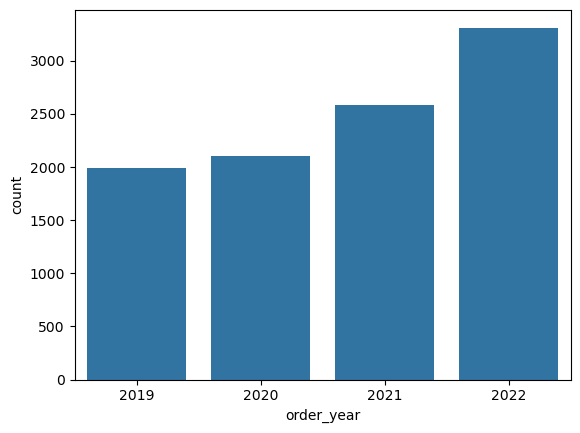

<Figure size 400x300 with 0 Axes>

In [47]:
sns.countplot(data=df,x='order_year')
plt.figure(figsize=(4,3))

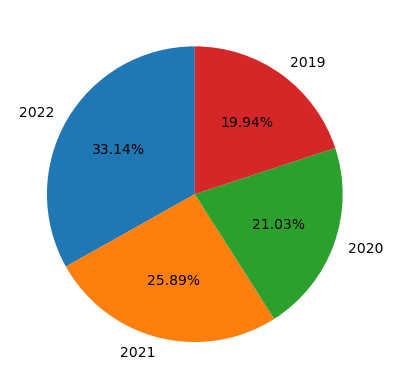

<Figure size 400x300 with 0 Axes>

In [48]:
plt.pie(y_values,labels=x_values,autopct="%0.2f%%",startangle=90)
plt.figure(figsize=(4,3))
plt.show()

In [49]:
#Finding the most profitable year

profitable_year =df.groupby('order_year')['sales'].sum().sort_values(ascending=False).round()[:1]

In [50]:
profitable_year

order_year
2022    733215.0
Name: sales, dtype: float64

# Analysing the Category column:

In [51]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [52]:
df['category'].value_counts()

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

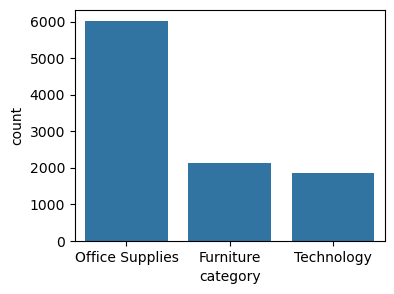

In [53]:
#maximum number of orders placed in the category
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='category')

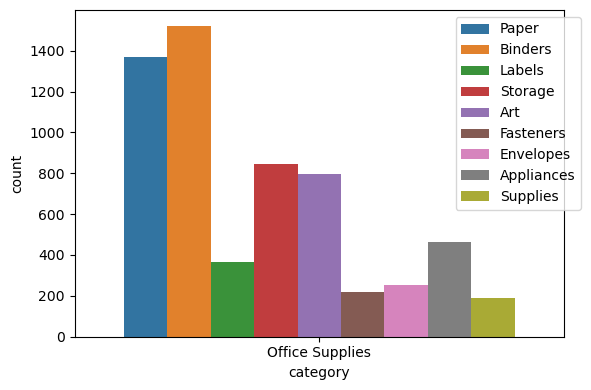

In [54]:
# subcategory sales in the profitable category (office suppliers)
plt.figure(figsize=(6,4))
sns.countplot(data=df[df['category'] == 'Office Supplies'],x='category',hue='subcategory')
plt.legend(bbox_to_anchor = (1.05,1),loc='upper right')
plt.tight_layout()

# Analysing the 'State' column:

In [55]:
# Top 5  states that has received maximum number of orders

df['state'].str.strip().unique()


array(['Texas', 'Illinois', 'Pennsylvania', 'Georgia', 'California',
       'Kentucky', 'Virginia', 'Delaware', 'South Carolina', 'Ohio',
       'Louisiana', 'Oregon', 'Arizona', 'Arkansas', 'Tennessee',
       'Michigan', 'Florida', 'Nevada', 'Indiana', 'South Dakota',
       'New York', 'Wisconsin', 'Washington', 'New Jersey', 'Missouri',
       'North Carolina', 'Colorado', 'Utah', 'Minnesota', 'Mississippi',
       'New Mexico', 'Iowa', 'Massachusetts', 'Alabama', 'Montana',
       'Idaho', 'Maryland', 'Connecticut', 'New Hampshire', 'Oklahoma',
       'Nebraska', 'Maine', 'Kansas', 'Rhode Island',
       'District of Columbia', 'Vermont', 'Wyoming', 'North Dakota',
       'West Virginia'], dtype=object)

In [56]:

df['state'].str.strip().value_counts()[:5]


state
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [57]:
df.head(2)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,order_year
0,US-2020-103800,2019-01-03,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019
1,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019


1. customers with most orders in the most profitable year
2. maximum number of days for shipping from the ordered date for a particular year
3. overall profit earned for a category
4. profit_margin

# customers with most orders in the most profitable year

In [58]:
profitable_year_value = profitable_year.index[0]
profitable_year_value


2022

In [59]:
profitable_year_values = profitable_year.values[0]
profitable_year_values

733215.0

In [60]:

df[df['order_year'] == profitable_year_value]['customer'].value_counts()[:5]

customer
John Lee          20
Seth Vernon       20
Mick Hernandez    19
Dean percer       19
Lena Cacioppo     17
Name: count, dtype: int64

# maximum number of days for shipping from the ordered date for a particular year

In [61]:

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['days_taken_to_ship'] = (df['ship_date'] - df['order_date']).dt.days

In [62]:
df.head(10)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,...,city,state,country,discount,profit,quantity,sales,profit_margin,order_year,days_taken_to_ship
0,US-2020-103800,2019-01-03,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,...,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019,4
1,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,...,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019,4
2,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,...,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625,2019,4
3,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,...,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375,2019,4
4,US-2020-141817,2019-01-05,2019-01-12,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,...,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500,2019,7
5,US-2020-106054,2019-01-06,2019-01-07,Jack O'Briant,Dixon,"Dixon Prang Watercolor Pencils, 10-Color Set w...",Corporate,Office Supplies,Art,South,...,Athens,Georgia,United States,0.0,5.2398,3,12.780,0.4100,2019,1
6,US-2020-130813,2019-01-06,2019-01-08,Lycoris Saunders,Xerox,Xerox 225,Consumer,Office Supplies,Paper,West,...,Los Angeles,California,United States,0.0,9.3312,3,19.440,0.4800,2019,2
7,US-2020-167199,2019-01-06,2019-01-10,Maria Etezadi,Global,Global Deluxe High-Back Manager's Chair,Home Office,Furniture,Chairs,South,...,Henderson,Kentucky,United States,0.0,746.4078,9,2573.820,0.2900,2019,4
8,US-2020-167199,2019-01-06,2019-01-10,Maria Etezadi,Rogers,Rogers Handheld Barrel Pencil Sharpener,Home Office,Office Supplies,Art,South,...,Henderson,Kentucky,United States,0.0,1.4796,2,5.480,0.2700,2019,4
9,US-2020-167199,2019-01-06,2019-01-10,Maria Etezadi,Ibico,Ibico Hi-Tech Manual Binding System,Home Office,Office Supplies,Binders,South,...,Henderson,Kentucky,United States,0.0,274.4910,2,609.980,0.4500,2019,4


In [63]:
df[df['order_year'] == profitable_year_value]['days_taken_to_ship'].value_counts()

days_taken_to_ship
4    866
5    670
2    431
6    409
3    388
7    211
0    173
1    164
Name: count, dtype: int64

In [64]:
# product category that sold in huge quantity
 
df.groupby('category')['quantity'].sum().sort_values(ascending=False)

category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: quantity, dtype: int64

In [65]:
# product sub category which sold in least quantity
df.groupby('subcategory')['quantity'].sum().sort_values(ascending=True)

subcategory
Copiers         234
Machines        440
Supplies        647
Bookcases       868
Envelopes       906
Fasteners       914
Tables         1241
Labels         1400
Appliances     1729
Chairs         2356
Accessories    2976
Art            3000
Storage        3158
Phones         3289
Furnishings    3563
Paper          5178
Binders        5974
Name: quantity, dtype: int64

In [66]:
# profit made in monthly basis in the profitable year
df['order_month'] = pd.to_datetime(df['order_date']).dt.month
df.head(2)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,...,state,country,discount,profit,quantity,sales,profit_margin,order_year,days_taken_to_ship,order_month
0,US-2020-103800,2019-01-03,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,...,Texas,United States,0.2,5.5512,2,16.448,0.3375,2019,4,1
1,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,...,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,2019,4,1


In [68]:
profit_over_month = df[df['order_year']== profitable_year_value].groupby('order_month')['profit'].sum().round()

order_month
1      7140.0
2      1614.0
3     14752.0
4       933.0
5      6343.0
6      8223.0
7      6953.0
8      9041.0
9     10992.0
10     9275.0
11     9690.0
12     8483.0
Name: profit, dtype: float64

<Axes: xlabel='order_month', ylabel='profit'>

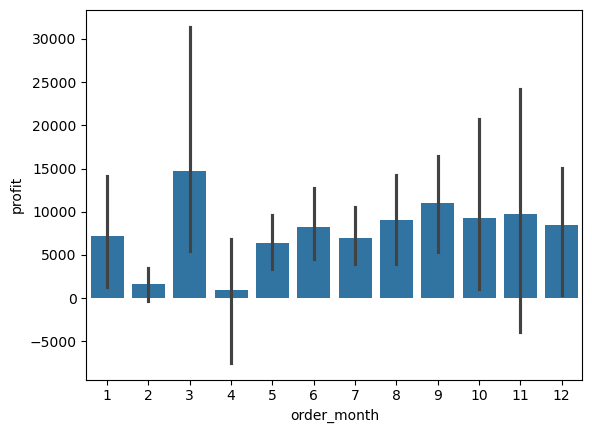

In [80]:
sns.barplot(data = df[df['order_year']== profitable_year_value],x = 'order_month',y = 'profit',estimator=sum)
#plt.savefig('profit_in_march.png')

In [76]:
df[(df['order_year']== profitable_year_value) & (df['order_month'] == 3)]['profit'].sum()

14751.891500000005

# Profit trends analysis over month

In [82]:
df.groupby('order_month')['profit_margin'].mean().sort_values(ascending=False)

order_month
9     0.139190
8     0.137771
12    0.131338
3     0.121277
7     0.120989
1     0.119084
11    0.118017
2     0.116755
6     0.109626
4     0.104686
10    0.100882
5     0.098313
Name: profit_margin, dtype: float64

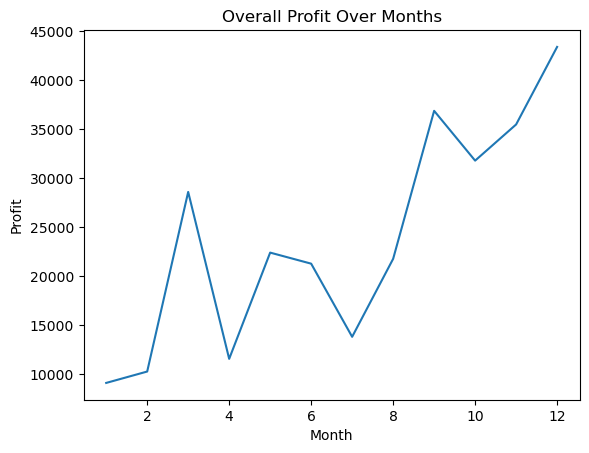

In [ ]:
# goal is to analyze trends over time, use line plot.
sns.lineplot(data=df, x='order_month', y='profit', estimator='sum', errorbar=None) #errorbar= confidence interval
plt.title('Overall Profit Over Months')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

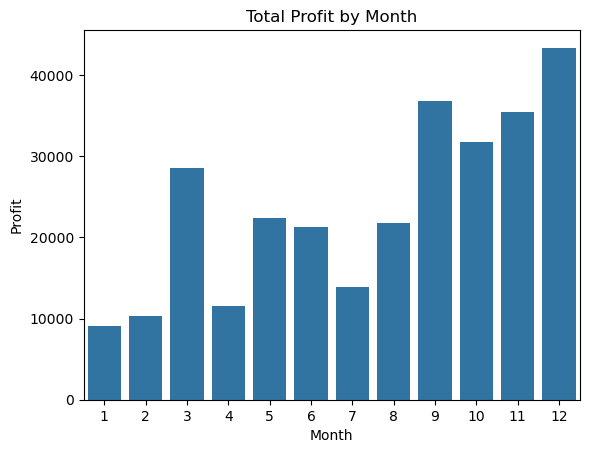

In [89]:
#to compare total profits per month, choose a bar plot.
sns.barplot(data=df, x='order_month', y='profit', estimator='sum',errorbar=None)
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

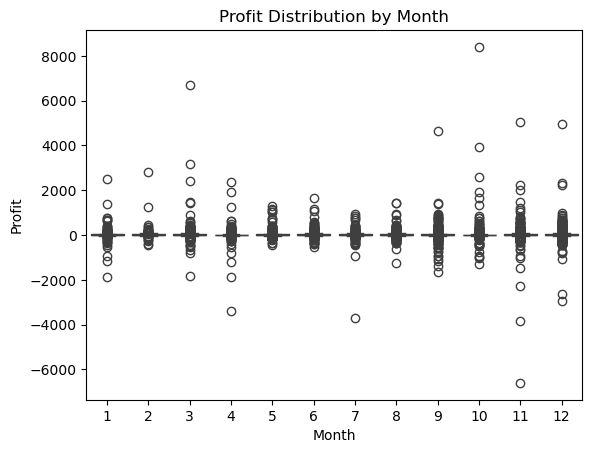

In [90]:
# For analyzing profit variability, use a box plot
sns.boxplot(data=df, x='order_month', y='profit')
plt.title('Profit Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [96]:
# pivot table - transform a long dataset into a more readable matrix format for analysis

heatmap_data = pd.pivot_table(data=df,index='order_month',columns='order_year',values='profit',aggfunc='sum')

<Axes: xlabel='order_year', ylabel='order_month'>

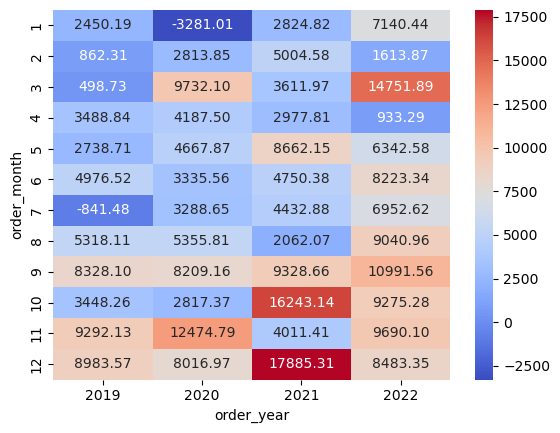

In [ ]:
# To summarize profit over multiple years, use heatmap
sns.heatmap(data=heatmap_data,annot=True,fmt='0.2f',cmap='coolwarm')